In [30]:
import pandas as pd

# 載入數據
dividend_data = pd.read_csv('dividend_rate.csv')  # 假設包含New York Life, Guardian Life, MassMutual的股息率
interest_rate_data = pd.read_csv('fed-funds-rate-historical-chart.csv')  # 假設包含美國政府利率數據

# 檢查數據格式和缺失值
print(dividend_data.head())
print(interest_rate_data.head())

   Year  New York Life  Guardian Life  MassMutual
0  2024            6.0           5.90         6.1
1  2023            5.8           5.75         6.0
2  2022            5.8           5.65         6.0
3  2021            5.8           5.65         6.0
4  2020            6.1           5.65         6.2
       date  value
0  1/1/1990   7.97
1  1/2/1990   8.54
2  1/3/1990   8.37
3  1/4/1990   8.29
4  1/5/1990   8.20


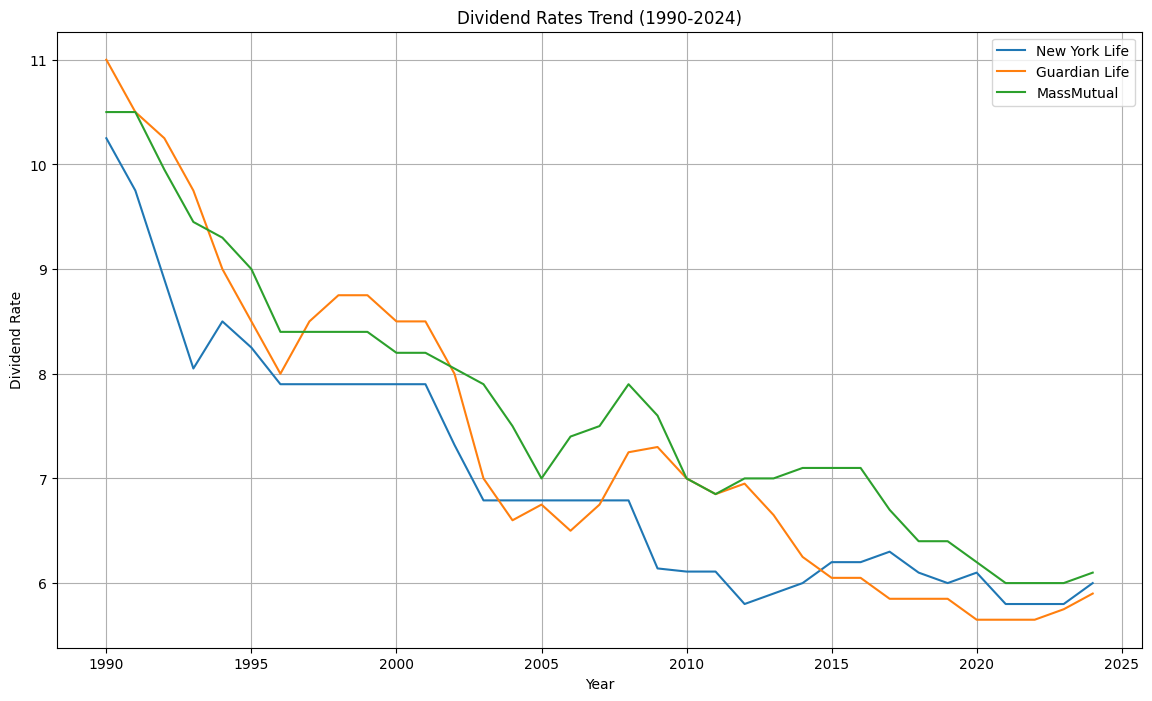

In [31]:
import matplotlib.pyplot as plt

# 繪製股息率趨勢圖
plt.figure(figsize=(14, 8))
plt.plot(dividend_data['Year'], dividend_data['New York Life'], label='New York Life')
plt.plot(dividend_data['Year'], dividend_data['Guardian Life'], label='Guardian Life')
plt.plot(dividend_data['Year'], dividend_data['MassMutual'], label='MassMutual')
plt.xlabel('Year')
plt.ylabel('Dividend Rate')
plt.title('Dividend Rates Trend (1990-2024)')
plt.legend()
plt.grid(True)
plt.show()

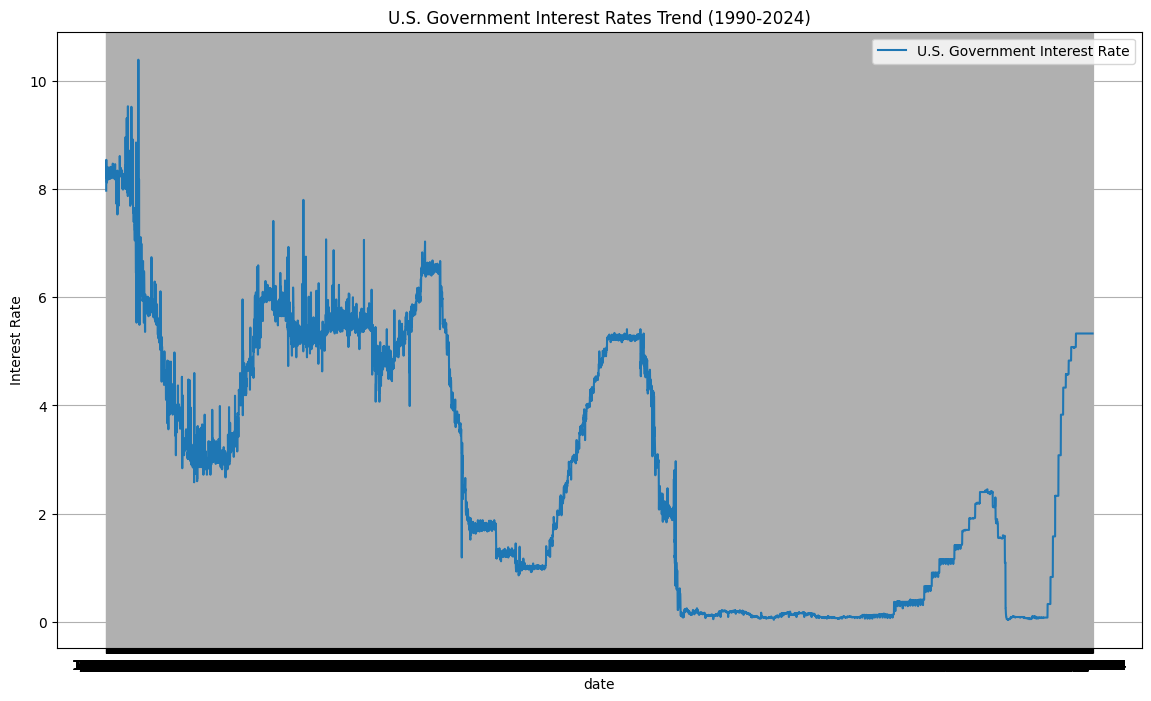

In [32]:
plt.figure(figsize=(14, 8))
plt.plot(interest_rate_data['date'], interest_rate_data['value'], label='U.S. Government Interest Rate')
plt.xlabel('date')
plt.ylabel('Interest Rate')
plt.title('U.S. Government Interest Rates Trend (1990-2024)')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# 合併數據
merged_data = pd.merge(dividend_data, interest_rate_data, on='Year')

# 計算相關性
correlation_matrix = merged_data.corr()
print(correlation_matrix)

# 繪製散佈圖
plt.figure(figsize=(14, 8))
plt.scatter(merged_data['Interest Rate'], merged_data['New York Life'], label='New York Life', alpha=0.5)
plt.scatter(merged_data['Interest Rate'], merged_data['Guardian Life'], label='Guardian Life', alpha=0.5)
plt.scatter(merged_data['Interest Rate'], merged_data['MassMutual'], label='MassMutual', alpha=0.5)
plt.xlabel('U.S. Government Interest Rate')
plt.ylabel('Dividend Rate')
plt.title('Correlation between Dividend Rates and U.S. Government Interest Rates')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'Year'

# Test

In [34]:
import pandas as pd

# 假設interest_rate_data已經載入並包含Date和Interest Rate列
# interest_rate_data = pd.read_csv('/path/to/interest_rate_data.csv')

# 確保Date列是日期類型
interest_rate_data['date'] = pd.to_datetime(interest_rate_data['date'])

# 提取年份
interest_rate_data['Year'] = interest_rate_data['date'].dt.year

# 按年聚合數據，計算每年的平均利率
annual_interest_rate = interest_rate_data.groupby('Year')['value'].mean().reset_index()

# 合併數據框架
merged_data = pd.merge(dividend_data, annual_interest_rate, on='Year', how='inner')

# 檢查合併後的數據框架
print(merged_data)


    Year  New York Life  Guardian Life  MassMutual     value
0   2024           6.00           5.90        6.10  5.330000
1   2023           5.80           5.75        6.00  5.026200
2   2022           5.80           5.65        6.00  1.675960
3   2021           5.80           5.65        6.00  0.078770
4   2020           6.10           5.65        6.20  0.362648
5   2019           6.00           5.85        6.40  2.163068
6   2018           6.10           5.85        6.40  1.789596
7   2017           6.30           5.85        6.70  1.001377
8   2016           6.20           6.05        7.10  0.393197
9   2015           6.20           6.05        7.10  0.133726
10  2014           6.00           6.25        7.10  0.088493
11  2013           5.90           6.65        7.00  0.107342
12  2012           5.80           6.95        7.00  0.140574
13  2011           6.11           6.85        6.85  0.101507
14  2010           6.11           7.00        7.00  0.176247
15  2009           6.14 

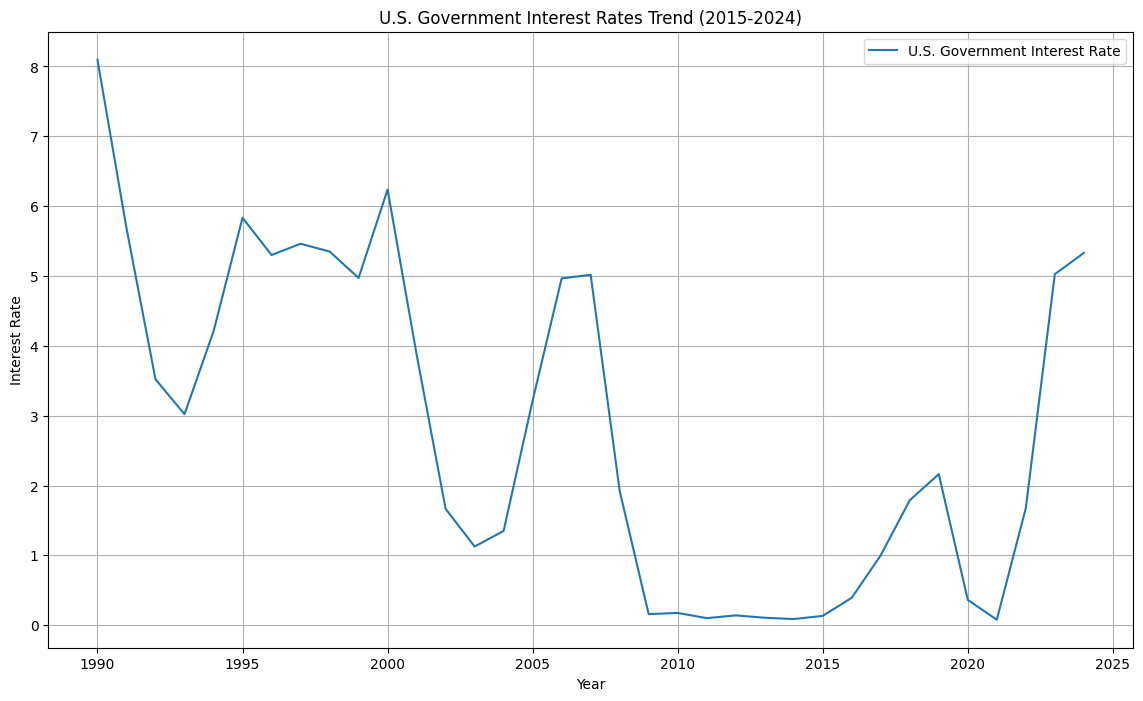

In [35]:
# 繪製利率趨勢圖
plt.figure(figsize=(14, 8))
plt.plot(merged_data['Year'], merged_data['value'], label='U.S. Government Interest Rate')
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.title('U.S. Government Interest Rates Trend (2015-2024)')
plt.legend()
plt.grid(True)
plt.show()


                   Year  New York Life  Guardian Life  MassMutual     value
Year           1.000000      -0.910892      -0.928813   -0.949662 -0.581309
New York Life -0.910892       1.000000       0.946794    0.952135  0.732692
Guardian Life -0.928813       0.946794       1.000000    0.965963  0.613699
MassMutual    -0.949662       0.952135       0.965963    1.000000  0.577228
value         -0.581309       0.732692       0.613699    0.577228  1.000000


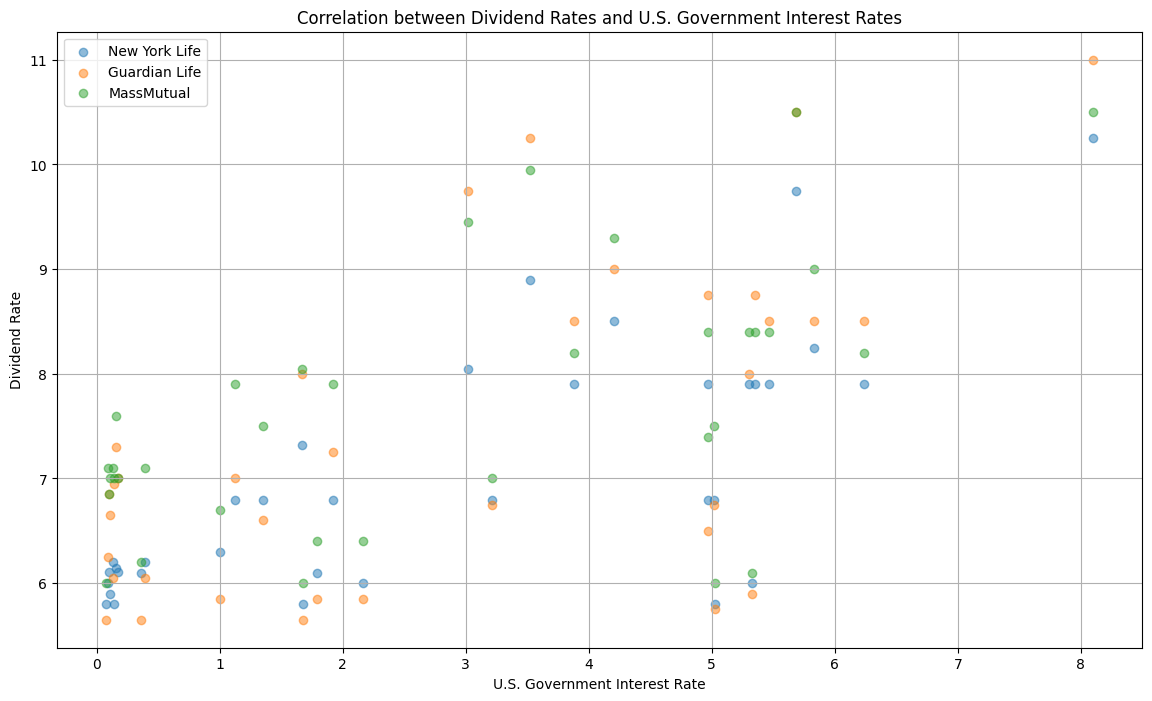

In [36]:
# 計算相關性矩陣
correlation_matrix = merged_data.corr()
print(correlation_matrix)

# 繪製散佈圖
plt.figure(figsize=(14, 8))
plt.scatter(merged_data['value'], merged_data['New York Life'], label='New York Life', alpha=0.5)
plt.scatter(merged_data['value'], merged_data['Guardian Life'], label='Guardian Life', alpha=0.5)
plt.scatter(merged_data['value'], merged_data['MassMutual'], label='MassMutual', alpha=0.5)
plt.xlabel('U.S. Government Interest Rate')
plt.ylabel('Dividend Rate')
plt.title('Correlation between Dividend Rates and U.S. Government Interest Rates')
plt.legend()
plt.grid(True)
plt.show()


                   Year  New York Life  Guardian Life  MassMutual     value
Year           1.000000      -0.910892      -0.928813   -0.949662 -0.581309
New York Life -0.910892       1.000000       0.946794    0.952135  0.732692
Guardian Life -0.928813       0.946794       1.000000    0.965963  0.613699
MassMutual    -0.949662       0.952135       0.965963    1.000000  0.577228
value         -0.581309       0.732692       0.613699    0.577228  1.000000


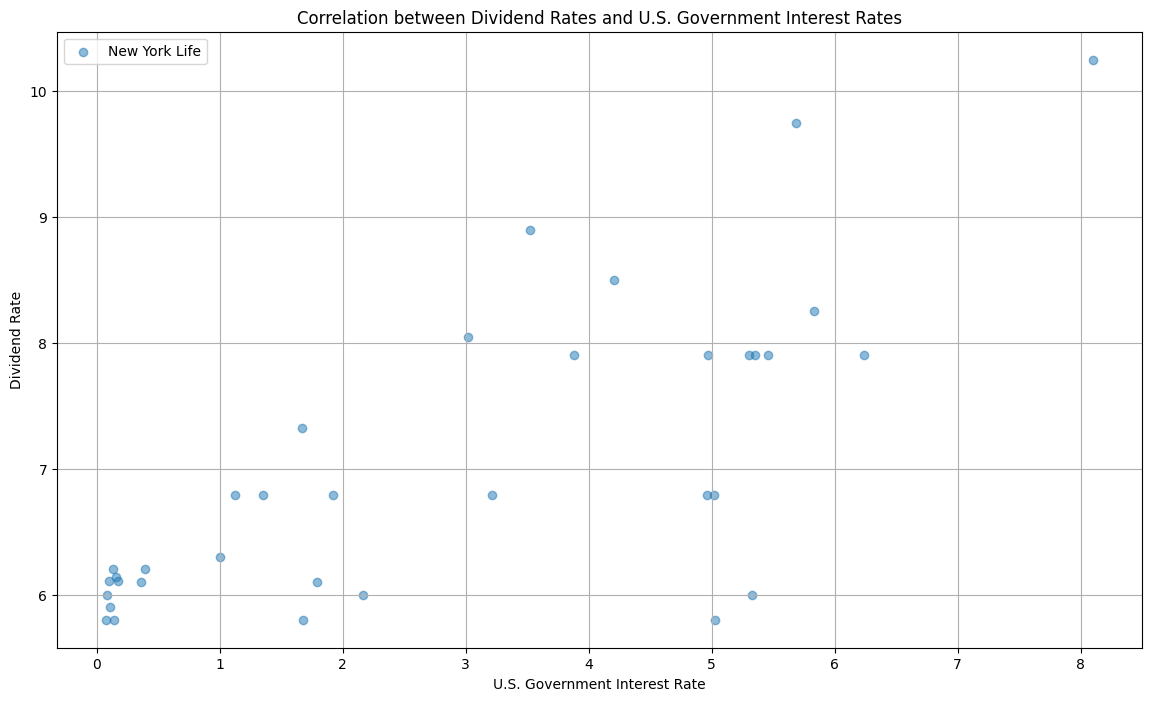

In [37]:
# 計算相關性矩陣
correlation_matrix = merged_data.corr()
print(correlation_matrix)

# 繪製散佈圖
plt.figure(figsize=(14, 8))
plt.scatter(merged_data['value'], merged_data['New York Life'], label='New York Life', alpha=0.5)
plt.xlabel('U.S. Government Interest Rate')
plt.ylabel('Dividend Rate')
plt.title('Correlation between Dividend Rates and U.S. Government Interest Rates')
plt.legend()
plt.grid(True)
plt.show()


                   Year  New York Life  Guardian Life  MassMutual     value
Year           1.000000      -0.910892      -0.928813   -0.949662 -0.581309
New York Life -0.910892       1.000000       0.946794    0.952135  0.732692
Guardian Life -0.928813       0.946794       1.000000    0.965963  0.613699
MassMutual    -0.949662       0.952135       0.965963    1.000000  0.577228
value         -0.581309       0.732692       0.613699    0.577228  1.000000


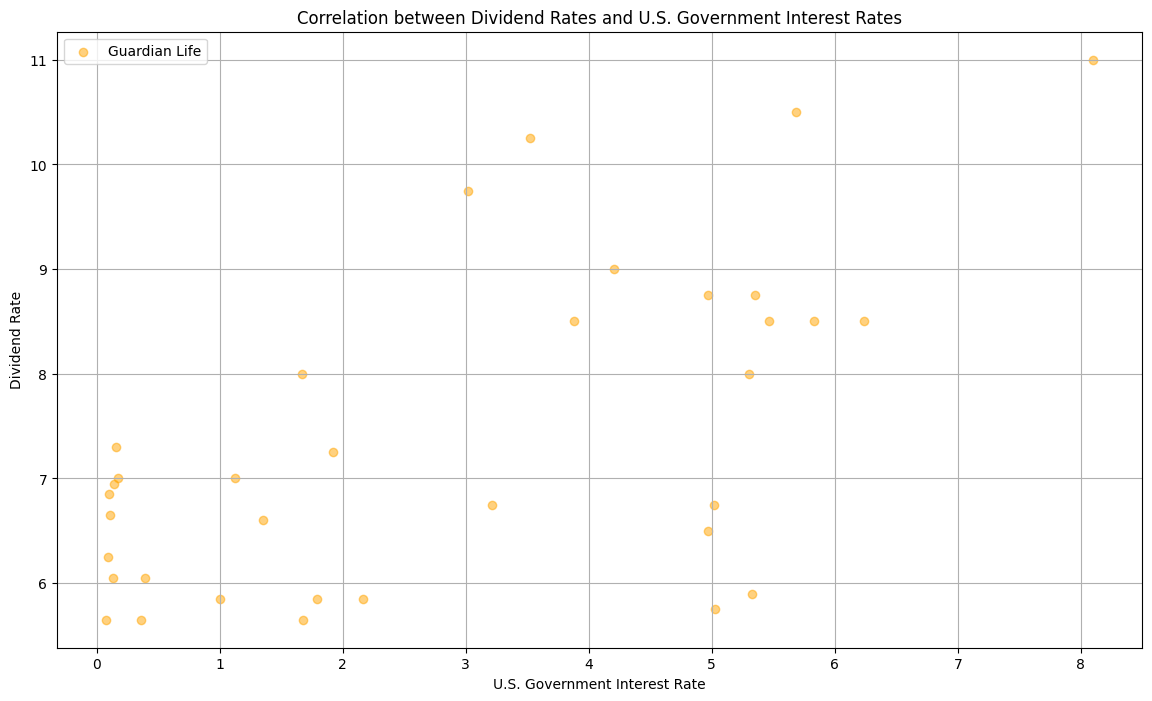

In [41]:
# 計算相關性矩陣
correlation_matrix = merged_data.corr()
print(correlation_matrix)

# 繪製散佈圖
plt.figure(figsize=(14, 8))
plt.scatter(merged_data['value'], merged_data['Guardian Life'], label='Guardian Life', alpha=0.5, color = 'orange')
plt.xlabel('U.S. Government Interest Rate')
plt.ylabel('Dividend Rate')
plt.title('Correlation between Dividend Rates and U.S. Government Interest Rates')
plt.legend()
plt.grid(True)
plt.show()


                   Year  New York Life  Guardian Life  MassMutual     value
Year           1.000000      -0.910892      -0.928813   -0.949662 -0.581309
New York Life -0.910892       1.000000       0.946794    0.952135  0.732692
Guardian Life -0.928813       0.946794       1.000000    0.965963  0.613699
MassMutual    -0.949662       0.952135       0.965963    1.000000  0.577228
value         -0.581309       0.732692       0.613699    0.577228  1.000000


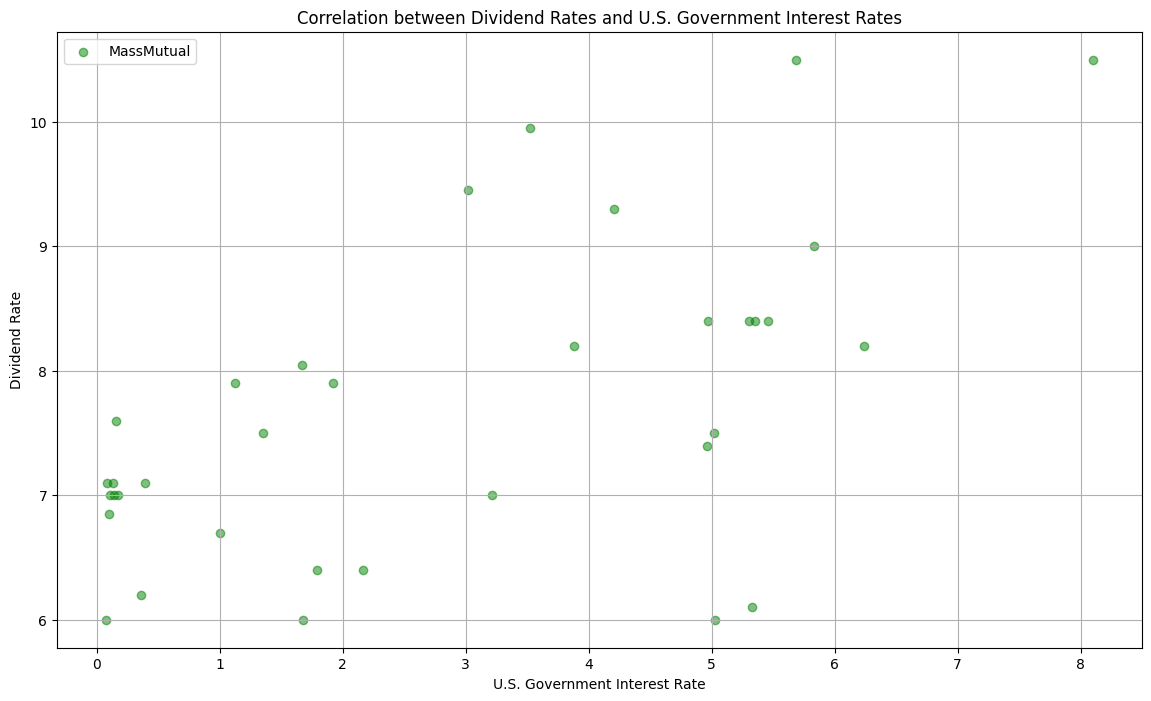

In [42]:
# 計算相關性矩陣
correlation_matrix = merged_data.corr()
print(correlation_matrix)

# 繪製散佈圖
plt.figure(figsize=(14, 8))
plt.scatter(merged_data['value'], merged_data['MassMutual'], label='MassMutual', alpha=0.5, color='green')
plt.xlabel('U.S. Government Interest Rate')
plt.ylabel('Dividend Rate')
plt.title('Correlation between Dividend Rates and U.S. Government Interest Rates')
plt.legend()
plt.grid(True)
plt.show()
